***Clean-Up of the trigger event variables***

In [1]:
import pandas as pd
import numpy as np
import os
import json
import requests
import matplotlib as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pycountry

start with the UCDP data

**1. UCDP**

In [2]:
#set in the params, what i want to get, but dont i need to flatten the data first?
#import requests, math
#url="https://ucdpapi.pcr.uu.se/api/gedevents/23.1?pagesize=100"
#datasets_per_request=100
#data_count =316818

#print("Data to be Downloaded: ", data_count)


# Start with an empty list
#total_results = []
# do paging correctly
# using limit and offset system query option
#request_count = math.ceil(data_count / datasets_per_request)
#print("Numbers of requests: ", request_count)

#for i in range(0, request_count):
 #   request_params = {
  #      "limit": datasets_per_request,
   #     "offset": i* datasets_per_request
    #}
 # trying to do the Requests 10 times:
    #for i in range(10):
     #   try : # catch connection Error if it appears
      #      response = requests.get(url, params=request_params)
       #     print(response.status_code)
        #    print(response.headers)
         #   break # exit for loop when successfull
        #except requests.ConnectionError:
         #   print("Request failed. trying again")
          #  continue

    #print('got data from: ', response.url)
    #data = response.json()#['results']

    #total_results.append(data)

#print("We have", len(total_results), "total results")

In [3]:
#total_results

In [4]:
#parse into a dataframe
#data = pd.DataFrame(total_results['Result'])
#print(data)

In [5]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\IV'

In [6]:
#load data from the csv created
data = pd.read_csv("GEDEvent_v23_1.csv")

In [7]:
# receiving the fist x rows of the dataframe
display(data.head())
#receiving the first 2 rows of the dataframe
display(data.head(2))
#get the name of all columns
print(data.columns)

#check for missingness
is_null = data.isnull().sum()
display(is_null)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,500153,AFG-2023-3-951-107,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-16 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
1,500154,AFG-2023-3-951-108,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-16 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
2,500064,AFG-2023-3-951-105,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-20 00:00:00.000,0,0,0,0,0,2,0,700.0,NaN
3,500152,AFG-2023-3-951-106,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-20 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
4,498332,AFG-2023-3-973-388,2023,True,Clear,3,234,506,IS - Civilians,234,...,2023-11-07 00:00:00.000,0,0,7,0,7,7,7,NaN,NaN


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,500153,AFG-2023-3-951-107,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-16 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
1,500154,AFG-2023-3-951-108,2023,True,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2023-11-16 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN


Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')


id                      0
relid                   0
year                    0
active_year             0
code_status             0
type_of_violence        0
conflict_dset_id        0
conflict_new_id         0
conflict_name           0
dyad_dset_id            0
dyad_new_id             0
dyad_name               0
side_a_dset_id          0
side_a_new_id           0
side_a                  0
side_b_dset_id          0
side_b_new_id           0
side_b                  0
number_of_sources       0
source_article          1
source_office           1
source_date             1
source_headline         1
source_original       191
where_prec              0
where_coordinates       0
where_description      88
adm_1                  97
adm_2                 279
latitude                0
longitude               0
geom_wkt                0
priogrid_gid            0
country                 0
country_id              0
region                  0
event_clarity           0
date_prec               0
date_start  

In [8]:
#filtering data can be done through the filter function
data_ucdp= data.filter(['id', 'relid', 'year', 'type_of_violence', 'country', 'country_id','date_start', 'date_end', 'best','gwnoa', 'gwnob'])
display(data_ucdp)
#rename & select columns
data_ucdp = data_ucdp.rename(columns= {'best':'fatality_best_estimate'})


,id,relid,year,type_of_violence,country,country_id,date_start,date_end,best,gwnoa,gwnob
0,500153,AFG-2023-3-951-107,2023,3,Afghanistan,700,2023-11-16 00:00:00.000,2023-11-16 00:00:00.000,0,700.0,NaN
1,500154,AFG-2023-3-951-108,2023,3,Afghanistan,700,2023-11-16 00:00:00.000,2023-11-16 00:00:00.000,0,700.0,NaN
2,500064,AFG-2023-3-951-105,2023,3,Afghanistan,700,2023-11-18 00:00:00.000,2023-11-20 00:00:00.000,0,700.0,NaN
3,500152,AFG-2023-3-951-106,2023,3,Afghanistan,700,2023-11-20 00:00:00.000,2023-11-20 00:00:00.000,0,700.0,NaN
4,498332,AFG-2023-3-973-388,2023,3,Afghanistan,700,2023-11-07 00:00:00.000,2023-11-07 00:00:00.000,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2161,502227,YEM-2023-1-14595-269,2023,1,Yemen (North Yemen),678,2023-11-30 00:00:00.000,2023-11-30 00:00:00.000,1,678.0,NaN
2162,502228,YEM-2023-1-14595-270,2023,1,Yemen (North Yemen),678,2023-11-30 00:00:00.000,2023-11-30 00:00:00.000,2,678.0,NaN
2163,496915,YEM-2023-2-14596-37,2023,2,Yemen (North Yemen),678,2023-10-30 00:00:00.000,2023-11-01 00:00:00.000,2,NaN,NaN
2164,498699,YEM-2023-2-14596-36,2023,2,Yemen (North Yemen),678,2023-11-02 00:00:00.000,2023-11-02 00:00:00.000,3,NaN,NaN


In [9]:
#match te start and end dates to find differences
data_ucdp['date_start'].equals(data_ucdp['date_end'])

False

In [10]:
data_ucdp['check'] = data_ucdp['date_start'].isin(data_ucdp['date_end'])
data_ucdp.check

0        True
1        True
2        True
3        True
4        True
        ...  
2161     True
2162     True
2163    False
2164     True
2165     True
Name: check, Length: 2166, dtype: bool

In [11]:
test = data_ucdp[data_ucdp['check'] == False]
test
#the check has given us the indication, that the start and end date of the events 
#are mostly the same day, so we can use one column as event column

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
13,502427,ANG-2023-1-1-XXX540-4,2023,1,Angola,540,2023-01-01 00:00:00.000,2023-11-01 00:00:00.000,21,NaN,NaN,False
301,502957,COL-2023-2-2-XXX100-54,2023,2,Colombia,100,2023-01-01 00:00:00.000,2023-11-24 00:00:00.000,0,NaN,NaN,False
357,503441,DRC-2023-3-934-70,2023,3,DR Congo (Zaire),490,2023-10-30 00:00:00.000,2023-11-06 00:00:00.000,1,490.0,NaN,False
359,502857,AFG-2023-3-973-416,2023,3,DR Congo (Zaire),490,2023-09-21 00:00:00.000,2023-11-24 00:00:00.000,26,NaN,NaN,False
371,499213,DRC-2023-1-11982-39,2023,1,DR Congo (Zaire),490,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,2,490.0,NaN,False
380,502854,DRC-2023-3-16065-100,2023,3,DR Congo (Zaire),490,2023-09-21 00:00:00.000,2023-11-24 00:00:00.000,26,NaN,NaN,False
390,498892,ETH-2023-1-16240-132.1,2023,1,Ethiopia,530,2023-10-23 00:00:00.000,2023-11-02 00:00:00.000,6,530.0,NaN,False
391,498893,ETH-2023-1-16240-132.2,2023,1,Ethiopia,530,2023-10-23 00:00:00.000,2023-11-02 00:00:00.000,6,530.0,NaN,False
524,498814,ISR-2023-1-477-141,2023,1,Israel,666,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,9,666.0,NaN,False
525,498856,ISR-2023-1-477-147,2023,1,Israel,666,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,4,666.0,NaN,False


In [12]:
test

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
13,502427,ANG-2023-1-1-XXX540-4,2023,1,Angola,540,2023-01-01 00:00:00.000,2023-11-01 00:00:00.000,21,NaN,NaN,False
301,502957,COL-2023-2-2-XXX100-54,2023,2,Colombia,100,2023-01-01 00:00:00.000,2023-11-24 00:00:00.000,0,NaN,NaN,False
357,503441,DRC-2023-3-934-70,2023,3,DR Congo (Zaire),490,2023-10-30 00:00:00.000,2023-11-06 00:00:00.000,1,490.0,NaN,False
359,502857,AFG-2023-3-973-416,2023,3,DR Congo (Zaire),490,2023-09-21 00:00:00.000,2023-11-24 00:00:00.000,26,NaN,NaN,False
371,499213,DRC-2023-1-11982-39,2023,1,DR Congo (Zaire),490,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,2,490.0,NaN,False
380,502854,DRC-2023-3-16065-100,2023,3,DR Congo (Zaire),490,2023-09-21 00:00:00.000,2023-11-24 00:00:00.000,26,NaN,NaN,False
390,498892,ETH-2023-1-16240-132.1,2023,1,Ethiopia,530,2023-10-23 00:00:00.000,2023-11-02 00:00:00.000,6,530.0,NaN,False
391,498893,ETH-2023-1-16240-132.2,2023,1,Ethiopia,530,2023-10-23 00:00:00.000,2023-11-02 00:00:00.000,6,530.0,NaN,False
524,498814,ISR-2023-1-477-141,2023,1,Israel,666,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,9,666.0,NaN,False
525,498856,ISR-2023-1-477-147,2023,1,Israel,666,2023-10-31 00:00:00.000,2023-11-01 00:00:00.000,4,666.0,NaN,False


In [13]:
#filter years to only contain 2020 - 2023
data_ucdp = data_ucdp[data_ucdp['year'] > 2019]
#create an event column based on the start and end date 
data_ucdp['conflict_event'] = data_ucdp['date_start'].copy()
data_ucdp = data_ucdp.drop(columns=['date_start','check','date_end'])

In [14]:
data_ucdp['year'].unique()

array([2023], dtype=int64)

In [15]:
#pip install pycountry

In [16]:
#add iso3 codes
##mport the function
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_ucdp['iso'] = data_ucdp.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_ucdp[data_ucdp['iso'].isna()]
print(inspect['iso'].unique())

list_iso = list(data_ucdp.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

[]


['AFG',
 'AGO',
 'BEN',
 'BRA',
 'BFA',
 'BDI',
 'CMR',
 'CAF',
 'TCD',
 'CHN',
 'COL',
 'COG',
 '',
 'ETH',
 'FRA',
 'GEO',
 'GIN',
 'HTI',
 'IND',
 'IDN',
 'IRQ',
 'ISR',
 'KEN',
 'LBN',
 'MLI',
 'MEX',
 'MOZ',
 'NER',
 'NGA',
 'PAK',
 'PHL',
 'SLE',
 'SOM',
 'SSD',
 'LKA',
 'SDN',
 'THA',
 'TGO',
 'UGA',
 'UKR']

In [17]:
inspect

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso


In [18]:
#inspect the iso codes and ensure their correctness
iso = data_ucdp = data_ucdp[data_ucdp['iso'] == '']
iso

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
357,503441,DRC-2023-3-934-70,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-10-30 00:00:00.000,
358,503440,DRC-2023-3-934-69,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-11-12 00:00:00.000,
359,502857,AFG-2023-3-973-416,2023,3,DR Congo (Zaire),490,26,NaN,NaN,2023-09-21 00:00:00.000,
360,499579,AFG-2023-3-973-393.1,2023,3,DR Congo (Zaire),490,2,NaN,NaN,2023-11-05 00:00:00.000,
361,499587,AFG-2023-3-973-393.2,2023,3,DR Congo (Zaire),490,4,NaN,NaN,2023-11-05 00:00:00.000,
...,...,...,...,...,...,...,...,...,...,...,...
2161,502227,YEM-2023-1-14595-269,2023,1,Yemen (North Yemen),678,1,678.0,NaN,2023-11-30 00:00:00.000,
2162,502228,YEM-2023-1-14595-270,2023,1,Yemen (North Yemen),678,2,678.0,NaN,2023-11-30 00:00:00.000,
2163,496915,YEM-2023-2-14596-37,2023,2,Yemen (North Yemen),678,2,NaN,NaN,2023-10-30 00:00:00.000,
2164,498699,YEM-2023-2-14596-36,2023,2,Yemen (North Yemen),678,3,NaN,NaN,2023-11-02 00:00:00.000,


In [19]:
iso.country.unique()

array(['DR Congo (Zaire)', 'Ivory Coast',
       'Kingdom of eSwatini (Swaziland)', 'Myanmar (Burma)',
       'Russia (Soviet Union)', 'Syria', 'Turkey', 'Venezuela',
       'Yemen (North Yemen)', 'Zimbabwe (Rhodesia)'], dtype=object)

In [20]:
#add the iso codes for the countriesthat were missed
data_ucdp.loc[data_ucdp['country'] == "Cote d'Ivoire", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == "Ivory Coast", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == 'Bolivia','iso']= 'BOL'
data_ucdp.loc[data_ucdp['country'] == 'DR Congo (Zaire)','iso']= 'COD'
data_ucdp.loc[data_ucdp['country'] == 'Iran','iso']= 'IRN'
data_ucdp.loc[data_ucdp['country'] == 'Kingdom of eSwatini (Swaziland)','iso']='SWZ'
data_ucdp.loc[data_ucdp['country'] == 'Madagascar (Malagasy)','iso']= 'MDG'
data_ucdp.loc[data_ucdp['country'] == 'Myanmar (Burma)','iso']= 'MMR'
data_ucdp.loc[data_ucdp['country'] == 'Russia (Soviet Union)','iso']= 'RUS'
data_ucdp.loc[data_ucdp['country'] == 'Syria','iso']='SYR'
data_ucdp.loc[data_ucdp['country'] == 'Tanzania','iso']= 'TZA'
data_ucdp.loc[data_ucdp['country'] == 'Turkey','iso']='TUR'
data_ucdp.loc[data_ucdp['country'] == 'United States of America','iso']= 'USA'
data_ucdp.loc[data_ucdp['country'] == 'Venezuela','iso']= 'VEN'
data_ucdp.loc[data_ucdp['country'] == 'Yemen (North Yemen)','iso']='YEM'
data_ucdp.loc[data_ucdp['country'] == 'Zimbabwe (Rhodesia)','iso']= 'ZWE'

In [21]:
data_ucdp

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
357,503441,DRC-2023-3-934-70,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-10-30 00:00:00.000,COD
358,503440,DRC-2023-3-934-69,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-11-12 00:00:00.000,COD
359,502857,AFG-2023-3-973-416,2023,3,DR Congo (Zaire),490,26,NaN,NaN,2023-09-21 00:00:00.000,COD
360,499579,AFG-2023-3-973-393.1,2023,3,DR Congo (Zaire),490,2,NaN,NaN,2023-11-05 00:00:00.000,COD
361,499587,AFG-2023-3-973-393.2,2023,3,DR Congo (Zaire),490,4,NaN,NaN,2023-11-05 00:00:00.000,COD
...,...,...,...,...,...,...,...,...,...,...,...
2161,502227,YEM-2023-1-14595-269,2023,1,Yemen (North Yemen),678,1,678.0,NaN,2023-11-30 00:00:00.000,YEM
2162,502228,YEM-2023-1-14595-270,2023,1,Yemen (North Yemen),678,2,678.0,NaN,2023-11-30 00:00:00.000,YEM
2163,496915,YEM-2023-2-14596-37,2023,2,Yemen (North Yemen),678,2,NaN,NaN,2023-10-30 00:00:00.000,YEM
2164,498699,YEM-2023-2-14596-36,2023,2,Yemen (North Yemen),678,3,NaN,NaN,2023-11-02 00:00:00.000,YEM


In [22]:
data_ucdp.type_of_violence.unique()

array([3, 1, 2], dtype=int64)

In [23]:
#filter for type 3 violence as os violence
data_os = data_ucdp[data_ucdp['type_of_violence'] == 3]
display(data_os)

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
357,503441,DRC-2023-3-934-70,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-10-30 00:00:00.000,COD
358,503440,DRC-2023-3-934-69,2023,3,DR Congo (Zaire),490,1,490.0,NaN,2023-11-12 00:00:00.000,COD
359,502857,AFG-2023-3-973-416,2023,3,DR Congo (Zaire),490,26,NaN,NaN,2023-09-21 00:00:00.000,COD
360,499579,AFG-2023-3-973-393.1,2023,3,DR Congo (Zaire),490,2,NaN,NaN,2023-11-05 00:00:00.000,COD
361,499587,AFG-2023-3-973-393.2,2023,3,DR Congo (Zaire),490,4,NaN,NaN,2023-11-05 00:00:00.000,COD
362,499588,AFG-2023-3-973-393.3,2023,3,DR Congo (Zaire),490,5,NaN,NaN,2023-11-05 00:00:00.000,COD
363,499576,AFG-2023-3-973-392,2023,3,DR Congo (Zaire),490,6,NaN,NaN,2023-11-06 00:00:00.000,COD
364,501140,AFG-2023-3-973-395,2023,3,DR Congo (Zaire),490,1,NaN,NaN,2023-11-10 00:00:00.000,COD
365,501143,AFG-2023-3-973-396.1,2023,3,DR Congo (Zaire),490,42,NaN,NaN,2023-11-12 00:00:00.000,COD
366,501152,AFG-2023-3-973-397,2023,3,DR Congo (Zaire),490,4,NaN,NaN,2023-11-12 00:00:00.000,COD


In [24]:
#safe as new dfs
data_os.to_csv("ucdp_os.csv")
data_ucdp.to_csv("ucdp_cleaned.csv")

In [25]:
#group by the country_id and country
data_ucdp=data_ucdp.groupby(['year','iso']).sum().reset_index()
display(data_ucdp)

,year,iso,id,relid,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event
0,2023,CIV,1003214,CDI-2023-2-2-XXX437-0CDI-2023-2-12471-1,4,Ivory CoastIvory Coast,874,56,0.0,0.0,2023-10-31 00:00:00.0002023-11-27 00:00:00.000
1,2023,COD,15555557,DRC-2023-3-934-70DRC-2023-3-934-69AFG-2023-3-9...,70,DR Congo (Zaire)DR Congo (Zaire)DR Congo (Zair...,15190,254,5880.0,0.0,2023-10-30 00:00:00.0002023-11-12 00:00:00.000...
2,2023,MMR,50498049,MYA-2023-1-1-XXX775-15MYA-2023-1-428-152MYA-20...,107,Myanmar (Burma)Myanmar (Burma)Myanmar (Burma)M...,78275,319,77500.0,0.0,2023-11-24 00:00:00.0002023-11-02 00:00:00.000...
3,2023,RUS,1001414,UKR-2023-1-14117-6780UKR-2023-1-17509-13,2,Russia (Soviet Union)Russia (Soviet Union),730,2,730.0,369.0,2023-11-16 00:00:00.0002023-11-09 00:00:00.000
4,2023,SWZ,1005634,SWA-2023-2-2-XXX572-19SWA-2023-3-3-XXX572-8,5,Kingdom of eSwatini (Swaziland)Kingdom of eSwa...,1144,2,0.0,0.0,2023-11-12 00:00:00.0002023-11-20 00:00:00.000
5,2023,SYR,65506894,SYR-2023-1-1-XXX652-85SYR-2023-1-1-XXX652-87SY...,171,SyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaS...,84760,220,54658.0,3330.0,2023-11-04 00:00:00.0002023-11-09 00:00:00.000...
6,2023,TUR,1002160,TUR-2023-1-781-199TUR-2023-1-781-223,2,TurkeyTurkey,1280,2,1280.0,0.0,2023-11-04 00:00:00.0002023-11-17 00:00:00.000
7,2023,VEN,2007156,VEN-2023-3-914-27VEN-2023-3-914-29VEN-2023-3-3...,12,VenezuelaVenezuelaVenezuelaVenezuela,404,4,202.0,0.0,2023-11-12 00:00:00.0002023-11-22 00:00:00.000...
8,2023,YEM,11029619,YEM-2023-3-1182-8YEM-2023-3-1182-9YEM-2023-1-1...,28,Yemen (North Yemen)Yemen (North Yemen)Yemen (N...,14916,37,13560.0,0.0,2023-11-17 00:00:00.0002023-11-23 00:00:00.000...
9,2023,ZWE,501459,ZIM-2023-3-943-0,3,Zimbabwe (Rhodesia),552,1,552.0,0.0,2023-11-09 00:00:00.000


In [26]:
#get descriptives and plot the data
print(data_ucdp.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

         year            id  type_of_violence   country_id  \
count    10.0  1.000000e+01         10.000000     10.00000   
mean   2023.0  1.491112e+07         40.400000  19812.50000   
std       0.0  2.354600e+07         57.979307  33072.00335   
min    2023.0  5.014590e+05          2.000000    404.00000   
25%    2023.0  1.002424e+06          3.250000    766.00000   
50%    2023.0  1.506395e+06          8.500000   1212.00000   
75%    2023.0  1.442407e+07         59.500000  15121.50000   
max    2023.0  6.550689e+07        171.000000  84760.00000   

       fatality_best_estimate         gwnoa        gwnob  
count               10.000000     10.000000    10.000000  
mean                89.700000  15436.200000   369.900000  
std                124.163915  27551.868393  1046.518084  
min                  1.000000      0.000000     0.000000  
25%                  2.000000    289.500000     0.000000  
50%                 20.500000   1005.000000     0.000000  
75%                179.00000

**2. Global Terror INDEX**

In [28]:
#load as xlsx file
data = pd.ExcelFile('GTI_renamed.xlsx')
#need to load individual years as individual sheets
df3 = pd.read_excel(data, sheet_name="2022",skiprows=5)
df3['year'] = 2022
df3.groupby(['year','iso3c']).sum()
print(df3)
df2 = pd.read_excel(data, sheet_name="2021",skiprows=5)
df2['year'] = 2021
df2.groupby(['year','iso3c']).sum()
print(df2)
df1 = pd.read_excel(data, sheet_name="2020",skiprows=5)
df1['year'] = 2020
df1.groupby(['year','iso3c']).sum()
print(df1)

     Unnamed: 0 iso3c              Country  Rank     Score  Incidents  \
0           NaN   AFG          Afghanistan     1  8.822244        225   
1           NaN   BFA         Burkina Faso     2  8.564101        310   
2           NaN   SOM              Somalia     3  8.463031        299   
3           NaN   MLI                 Mali     4  8.412392        272   
4           NaN   SYR                Syria     5  8.161243        197   
..          ...   ...                  ...   ...       ...        ...   
158         NaN   TKM         Turkmenistan    93  0.000000          0   
159         NaN   TLS          Timor-Leste    93  0.000000          0   
160         NaN   TTO  Trinidad and Tobago    93  0.000000          0   
161         NaN   ZMB               Zambia    93  0.000000          0   
162         NaN   ZWE             Zimbabwe    93  0.000000          0   

     Fatalities  Injuries  Hostages  year  
0           633       897         0  2022  
1          1135       496        84

In [29]:
#join all of the together to proceed
data_gti = pd.merge(df1,df2,how="outer")
data_gti = pd.merge(data_gti,df3,how="outer")
data_gti

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...,...
484,NaN,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,NaN,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,NaN,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,NaN,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [30]:
display(data_gti.head())
print(data_gti.columns)
#check for missingness
is_null = data_gti.isnull().sum()
display(is_null)

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020


Index(['Unnamed: 0', 'iso3c', 'Country', 'Rank', 'Score', 'Incidents',
       'Fatalities', 'Injuries', 'Hostages', 'year'],
      dtype='object')


Unnamed: 0    489
iso3c           0
Country         0
Rank            0
Score           0
Incidents       0
Fatalities      0
Injuries        0
Hostages        0
year            0
dtype: int64

In [31]:
#now filter and potentially rename the columns
data_gti = data_gti.drop('Unnamed: 0',axis='columns')
data_gti = data_gti.rename(columns={'iso3c':'iso', 'Country':'country_name', 'Rank':'gti_rank', 'Score':'gti_score','Incidents':'gti_incident_count','Fatalities':'gti_fat_count', 'Injuries':'gti_injured_count','Hostages':'gti_hostage_count'})
display(data_gti)

,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count,year
0,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...
484,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [32]:
#group the data and create the iso codes if needed
data_gti = data_gti.groupby(['year','iso']).sum()
display(data_gti)
data_gti.reset_index()

country_name  gti_rank  gti_score  gti_incident_count  \
year iso                                                                      
2020 AFG               Afghanistan         1   9.056336                 643   
     AGO                   Vietnam        89   0.681852                   0   
     ALB                      Togo       105   0.000000                   0   
     ARE                   Albania       105   0.000000                   0   
     ARG  Central African Republic        66   2.460256                   0   
...                            ...       ...        ...                 ...   
2022 VNM                   Vietnam        89   0.226891                   0   
     YEM                     Yemen        22   5.616402                   9   
     ZAF              South Africa        79   0.826319                   0   
     ZMB                    Zambia        93   0.000000                   0   
     ZWE                  Zimbabwe        93   0.000000                   0   

          gti_fat_count  gti_injured_count  gti_hostage_count  
year iso                                                       
2020 AFG           1292               2395                101  
     AGO              0                  0                  0  
     ALB              0                  0                  0  
     ARE              0                  0                  0  
     ARG              0                  0                  0  
...                 ...                ...                ...  
2022 VNM              0                  0                  0  
     YEM             19                 23                  5  
     ZAF              0                  0                  0  
     ZMB              0                  0                  0  
     ZWE              0                  0                  0  

[489 rows x 7 columns]

,year,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count
0,2020,AFG,Afghanistan,1,9.056336,643,1292,2395,101
1,2020,AGO,Vietnam,89,0.681852,0,0,0,0
2,2020,ALB,Togo,105,0.000000,0,0,0,0
3,2020,ARE,Albania,105,0.000000,0,0,0,0
4,2020,ARG,Central African Republic,66,2.460256,0,0,0,0
...,...,...,...,...,...,...,...,...,...
484,2022,VNM,Vietnam,89,0.226891,0,0,0,0
485,2022,YEM,Yemen,22,5.616402,9,19,23,5
486,2022,ZAF,South Africa,79,0.826319,0,0,0,0
487,2022,ZMB,Zambia,93,0.000000,0,0,0,0


In [33]:
#describe and plot the data
#get descriptives and plot the data
print(data_gti.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

         gti_rank   gti_score  gti_incident_count  gti_fat_count  \
count  489.000000  489.000000          489.000000     489.000000   
mean    68.676892    2.258682           28.505112      43.889571   
std     32.390893    2.672987          103.667919     164.734511   
min      1.000000    0.000000            0.000000       0.000000   
25%     41.000000    0.000000            0.000000       0.000000   
50%     82.000000    1.005884            0.000000       0.000000   
75%     96.000000    4.218670            3.000000       1.000000   
max    105.000000    9.130089          889.000000    1499.000000   

       gti_injured_count  gti_hostage_count  
count         489.000000         489.000000  
mean           42.813906           4.566462  
std           195.376696          25.616741  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             1.000000           0.000000  
max          2395.0

In [34]:
#save as csv
data_gti.to_csv("data_gti.csv")

**3. Coup Data**

In [50]:
data_coup=pd.read_csv("raw_coup_data.csv")

In [51]:
display(data_coup.head())
print(data_coup.columns)
#check for missingness
is_null = data_coup.isnull().sum()
display(is_null)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,70003101963,700,Afghanistan,1963,3,10,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,70007171973,700,Afghanistan,1973,7,17,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,70009201973,700,Afghanistan,1973,9,20,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,70011261976,700,Afghanistan,1976,11,26,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,70004271978,700,Afghanistan,1978,4,27,coup,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Index(['coup_id', 'cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'],
      dtype='object')


coup_id       0
cowcode       0
country       0
year          0
month         0
day           0
event_type    0
unrealized    0
realized      0
conspiracy    0
attempt       0
military      0
dissident     0
rebel         0
palace        0
foreign       0
auto          0
resign        0
popular       0
counter       0
other         0
noharm        0
injured       0
killed        0
harrest       0
jailed        0
tried         0
fled          0
exile         0
dtype: int64

In [52]:
#check that all the years I need are represented
list1 = list[data_coup.year.unique()]
list1

list[array([1963, 1973, 1976, 1978, 1979, 1990, 1992, 1996, 2001, 2021, 1946,
       1998, 1962, 1964, 1965, 1967, 1991, 1994, 2019, 1975, 1977, 1951,
       1952, 1955, 1956, 1957, 1960, 1961, 1966, 1970, 1971, 1981, 1982,
       1987, 1988, 2016, 1995, 2005, 2011, 2007, 2012, 1969, 1972, 1947,
       1950, 1953, 1958, 1959, 1968, 1974, 1980, 1984, 1945, 2022, 1989,
       1983, 2003, 2014, 2015, 1993, 2006, 1997, 2000, 2002, 2008, 2013,
       1948, 1949, 1999, 1954, 2004, 1986, 2020, 2009, 1985, 2010, 2018,
       2017], dtype=int64)]

In [54]:
data_coup.day

0      10
1      17
2      20
3      26
4      27
       ..
976    28
977    11
978    10
979    29
980    15
Name: day, Length: 981, dtype: int64

In [58]:
#now filter and potentially rename the columns
data_coup = data_coup.filter(['cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'])
data_coup=data_coup.rename(columns={'day':'date','unrealized':"coup_unrealized_count",'realized':"coup_realized_count", 'conspiracy':"coup_conspira_count", 'attempt':"coup_attempt_count", 'military':'coup_milit_count','dissident':"coup_dissident_count", 'rebel':"coup_rebel_count", 'palace':"coup_palace_count", 'foreign':"coup_foreign_count", 'auto':"coup_auto_count", 'resign':"coup_resign_count", 'popular':"coup_popular_count",'counter':"coup_counter_count", 'other':"coup_other_count", 'noharm':"coup_noharm_count", 'injured':"coup_injured_count", 'killed':"coup_killed_count", 'harrest':"coup_housearrest_count", 'jailed':"coup_jailed_count",'tried':"coup_tried_count", 'fled':"coup_fled_count", 'exile':'coup_exile_count'})
print(data_coup.columns)

Index(['cowcode', 'country', 'year', 'month', 'date', 'event_type',
       'coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count', 'coup_noharm_count',
       'coup_injured_count', 'coup_killed_count', 'coup_housearrest_count',
       'coup_jailed_count', 'coup_tried_count', 'coup_fled_count',
       'coup_exile_count'],
      dtype='object')


In [60]:
#now filter to only contain years from 2020 onwards
data_coup = data_coup[data_coup['year'] > 2019]
#make a YYYYMMDD format columns 
from datetime import date
coup_event = []
for y, m, d in zip(data_coup.year, data_coup.month, data_coup.date):
    coup_event.append(date(y, m, d))
data_coup['coup_event'] = coup_event
display(data_coup)

,cowcode,country,year,month,date,event_type,coup_unrealized_count,coup_realized_count,coup_conspira_count,coup_attempt_count,...,coup_other_count,coup_noharm_count,coup_injured_count,coup_killed_count,coup_housearrest_count,coup_jailed_count,coup_tried_count,coup_fled_count,coup_exile_count,coup_event
11,700,Afghanistan,2021,8,15,coup,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2021-08-15
66,370,Belarus,2021,7,5,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2021-07-05
122,140,Brazil,2022,12,29,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2022-12-29
136,439,Burkina Faso,2022,1,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-01-08
137,439,Burkina Faso,2022,1,24,coup,0,1,0,0,...,0,1,0,0,1,1,0,0,0,2022-01-24
138,439,Burkina Faso,2022,9,30,coup,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2022-09-30
171,482,Central African Republic,2021,1,13,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2021-01-13
186,483,Chad,2021,4,21,coup,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2021-04-21
263,490,Democratic Republic of the Congo,2022,2,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-02-08
313,92,El Salvador,2020,2,9,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2020-02-09


In [61]:
#create a variable containing the sum
data_coup["coup_summed"] = data_coup[['coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count']].astype(float).sum(1)
data_coup.coup_summed

11     2.0
66     3.0
122    3.0
136    3.0
137    2.0
138    2.0
171    4.0
186    3.0
263    3.0
313    4.0
342    4.0
351    5.0
414    3.0
497    3.0
498    6.0
499    2.0
580    2.0
581    2.0
582    4.0
611    2.0
630    3.0
655    3.0
699    3.0
755    4.0
756    4.0
791    2.0
820    4.0
821    2.0
905    2.0
930    4.0
932    4.0
Name: coup_summed, dtype: float64

In [62]:
#group the data and create the iso codes if needed
#add iso3 codes
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_coup['iso'] = data_coup.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_coup[data_coup['iso'].isna()]
inspect['iso'].unique()

list_iso = list(data_coup.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

['AFG',
 'BLR',
 'BRA',
 'BFA',
 'CAF',
 'TCD',
 '',
 'SLV',
 'GMB',
 'DEU',
 'GNB',
 'JOR',
 'KAZ',
 'MLI',
 'MMR',
 'NER',
 'PAK',
 'PER',
 'STP',
 'SAU',
 'LKA',
 'SDN',
 'TUN',
 'UKR',
 'USA']

In [63]:
iso = data_coup[data_coup['iso'] == '']
print(iso)
##set iso manually for countries that were missed
data_coup.loc[data_coup['country'] == "Democratic Republic of the Congo", 'iso'] = 'COD'

     cowcode                           country  year  month  date  event_type  \
263      490  Democratic Republic of the Congo  2022      2     8  conspiracy   

     coup_unrealized_count  coup_realized_count  coup_conspira_count  \
263                      1                    0                    1   

     coup_attempt_count  ...  coup_injured_count  coup_killed_count  \
263                   0  ...                   0                  0   

     coup_housearrest_count  coup_jailed_count  coup_tried_count  \
263                       0                  0                 0   

     coup_fled_count  coup_exile_count  coup_event  coup_summed  iso  
263                0                 0  2022-02-08          3.0       

[1 rows x 31 columns]


<Axes: xlabel='year', ylabel='coup_summed'>

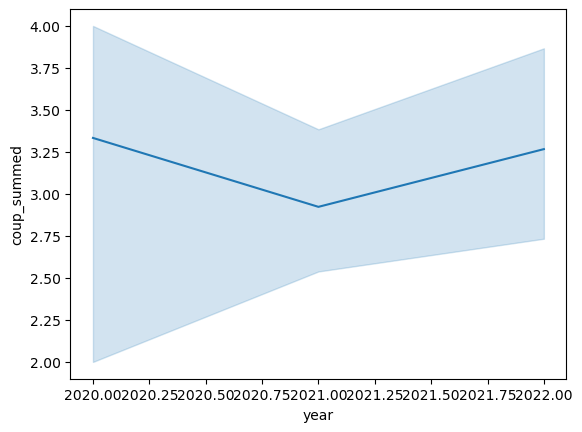

In [64]:
#simple temporal plot of coups
plot1 = sns.lineplot(data=data_coup,x='year',y='coup_summed')
plot1

In [65]:
#heatmap of coups per countries over time
heatmap = data_coup.pivot(index="iso", columns="coup_summed", values="year")
plo2 = sns.heatmap(heatmap)
plot2


ValueError: Index contains duplicate entries, cannot reshape

AttributeError: module 'matplotlib' has no attribute 'xlabel'

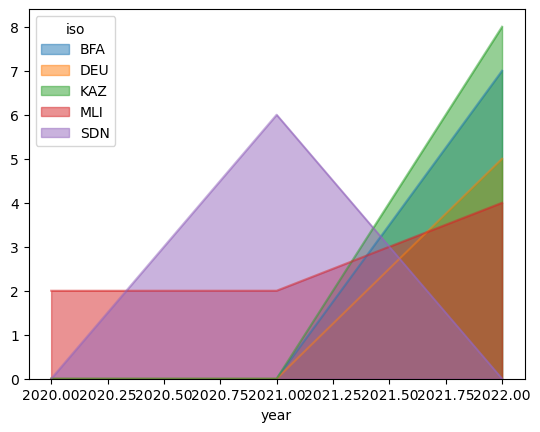

In [66]:
#top 10 countries
#time trend of the data
grouped = data_coup.groupby(['iso','year']).agg({'coup_summed': 'sum'})
top_countries = grouped.groupby('iso').agg({'coup_summed': 'sum'}).nlargest(5, 'coup_summed').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_countries)]

pivoted = filtered.reset_index().pivot(index='year', columns='iso', values='coup_summed')
pivoted.plot.area(stacked=False)
plt.xlabel('Year')
plt.ylabel('number of coups')
plt.savefig('timetrend_coups.png')
# Show the plot
plt.show()

In [67]:
#describe and plot the data
#get descriptives and plot the data
print(data_coup.describe())

          cowcode         year      month       date  coup_unrealized_count  \
count   31.000000    31.000000  31.000000  31.000000              31.000000   
mean   475.258065  2021.387097   5.709677  14.258065               0.645161   
std    204.613126     0.667204   4.009934   9.577640               0.486373   
min      2.000000  2020.000000   1.000000   1.000000               0.000000   
25%    403.500000  2021.000000   2.000000   6.000000               0.000000   
50%    439.000000  2021.000000   5.000000  11.000000               1.000000   
75%    644.000000  2022.000000   9.000000  24.000000               1.000000   
max    780.000000  2022.000000  12.000000  31.000000               1.000000   

       coup_realized_count  coup_conspira_count  coup_attempt_count  \
count            31.000000            31.000000           31.000000   
mean              0.354839             0.290323            0.354839   
std               0.486373             0.461414            0.486373   
min 

In [68]:
#save as csv
data_coup.to_csv("coup_data.csv")

**4. ACLED**

In [49]:
acled = pd.read_csv('acled_protest.csv')
acled

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,HTI5623,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (Haiti),NaN,6,...,Port-au-Prince,18.5435,-72.3388,1,Rezo Nodwes,National,"On 1 January 2024, in Port-au-Prince, Ouest, c...",0,crowd size=no report,1704766921
1,IND146449,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),NaN,6,...,Nagpur,21.1463,79.0849,1,Free Press Journal (India),National,"On 1 January 2024, the activists blocked roads...",0,crowd size=no report,1704833948
2,IND147247,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),CITU: Centre of Indian Trade Unions; Labor Gro...,6,...,Visakhapatnam,17.6800,83.2016,1,The Hindu,National,"On 1 January 2024, members of the GVMC Municip...",0,crowd size=no report,1704833954
3,NEP23464,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (Nepal),CPN(RM): Communist Party of Nepal (Revolutiona...,6,...,Kathmandu,27.7017,85.3206,1,Annapurna Post,National,"On 1 January 2024, police intervened by arrest...",0,crowd size=3,1704833954
4,IND147340,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),IYC: Indian Youth Congress,6,...,Kochi,9.9398,76.2602,1,The Hindu,National,"On 1 January 2024, members of the IYC staged b...",0,crowd size=no report,1704833954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,SRI3956,01 January 2020,2020,2,Demonstrations,Protests,Protest with intervention,Protesters (Sri Lanka),Tamil Ethnic Group (Sri Lanka),6,...,Vavuniya,8.7514,80.4971,1,Tamil Guardian,International,"As reported on January 1, Sri Lanka and EPDP p...",0,crowd size=no report,1680035142
23923,SUD13566,01 January 2020,2020,1,Demonstrations,Protests,Protest with intervention,Protesters (Sudan),Masalit Ethnic Group (Sudan); Refugees/IDPs (S...,6,...,Ardamata IDP Camp,13.4757,22.4931,1,Radio Dabanga,National,"On 1 January 2020, IDPs blocked the road betwe...",0,crowd size=hundreds,1685401337
23924,NIG15970,01 January 2020,2020,1,Demonstrations,Protests,Protest with intervention,Protesters (Nigeria),NaN,6,...,Ilorin,10.8819,4.0072,1,Premium Times (Nigeria),National,"On 1 January 2020, police forces dispersed a c...",0,crowd size=no report,1689711023
23925,HTI387,01 January 2020,2020,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Haiti),NaN,6,...,Gonaives,19.4475,-72.6890,1,AP; Haiti Press Network; Rezo Nodwes,National-International,"On 1 January 2020, in Gonaives, Artibonite, do...",0,crowd size=dozens,1696876355


In [71]:
acled.event_id_cnty.nunique()

23927

In [81]:
print(acled.columns)
acled=acled.filter(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'country', 'fatalities'])
#transform to datetime format
acled['protest_event_date'] = pd.to_datetime(acled['event_date'], format="mixed")
#get month_id
acled['month'] = pd.to_datetime(acled['protest_event_date']).dt.to_period('M')
#create event count
acled['event_count']= acled['event_id_cnty'].groupby(acled['month']).transform('nunique')
display(acled)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'country', 'fatalities',
       'protest_event_date', 'month'],
      dtype='object')


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,assoc_actor_2,inter2,interaction,civilian_targeting,iso,country,fatalities,protest_event_date,month,event_count
0,HTI5623,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (Haiti),NaN,6,...,NaN,1,16,NaN,332,Haiti,0,2024-01-01,2024-01,6
1,IND146449,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),NaN,6,...,NaN,1,16,NaN,356,India,0,2024-01-01,2024-01,6
2,IND147247,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),CITU: Centre of Indian Trade Unions; Labor Gro...,6,...,NaN,1,16,NaN,356,India,0,2024-01-01,2024-01,6
3,NEP23464,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (Nepal),CPN(RM): Communist Party of Nepal (Revolutiona...,6,...,NaN,1,16,NaN,524,Nepal,0,2024-01-01,2024-01,6
4,IND147340,01 January 2024,2024,1,Demonstrations,Protests,Protest with intervention,Protesters (India),IYC: Indian Youth Congress,6,...,NaN,1,16,NaN,356,India,0,2024-01-01,2024-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,SRI3956,01 January 2020,2020,2,Demonstrations,Protests,Protest with intervention,Protesters (Sri Lanka),Tamil Ethnic Group (Sri Lanka),6,...,EPDP: Eelam People's Democratic Party,1,16,NaN,144,Sri Lanka,0,2020-01-01,2020-01,547
23923,SUD13566,01 January 2020,2020,1,Demonstrations,Protests,Protest with intervention,Protesters (Sudan),Masalit Ethnic Group (Sudan); Refugees/IDPs (S...,6,...,NaN,1,16,NaN,729,Sudan,0,2020-01-01,2020-01,547
23924,NIG15970,01 January 2020,2020,1,Demonstrations,Protests,Protest with intervention,Protesters (Nigeria),NaN,6,...,NaN,1,16,NaN,566,Nigeria,0,2020-01-01,2020-01,547
23925,HTI387,01 January 2020,2020,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Haiti),NaN,6,...,Police Forces of Haiti (2017-),3,36,Civilian targeting,332,Haiti,0,2020-01-01,2020-01,547


In [82]:
acled.to_csv('acled_clean.csv')